In [304]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [1]:
import numpy as np
import pandas as pd
%pylab inline 
import h5py
from tqdm import tqdm
from sklearn import preprocessing
from sklearn import decomposition
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.random_projection import SparseRandomProjection
from scipy.sparse import load_npz, save_npz
from scipy.stats import pearsonr
import scipy.stats
import pandas as pd
import sklearn
import h5py
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
import pickle
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import json, urllib
import plotly
plotly.tools.set_credentials_file(username='james20141606', api_key='L3zPyULntDsWb4XC4fGS')
import plotly.plotly as py
from plotly.graph_objs import Scatter, Layout

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [24]:
plt.style.use('ggplot')

In [590]:
factors_ = {}
with h5py.File('sixfactors') as f:
    for i in range(4):
        factors_[statename[i]] = f[str(i)][:,:-1]

In [3]:
statename = ['AZ','CA','NM','TX']

In [171]:
trans = np.ones([50,5])
trans[:,1] = -1
trans[:,3] = -1

In [557]:
for i in range(4):
    factors_[statename[i]]= np.multiply(factors_[statename[i]],trans)

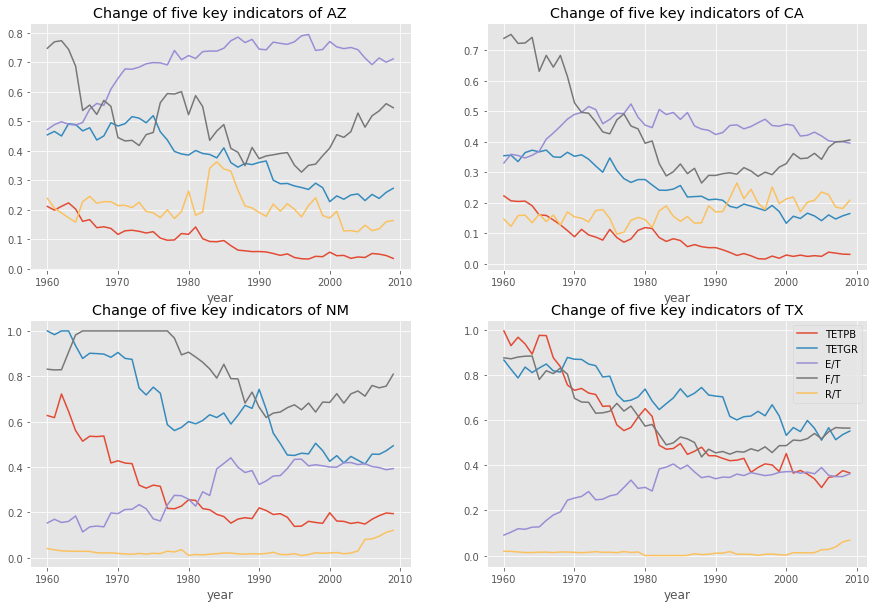

In [591]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
for t in range(2):
    for m in range(2):
        labels = ['TETPB','TETGR','E/T','F/T','R/T']
        for y_arr, label in zip(factors_[statename[t*2+m]][:,:].T, labels):
            ax[t,m].plot(y_arr, label=label)
        labels = [item.get_text() for item in ax[t,m].get_xticklabels()]
        for i in range(6):
            labels[i+1] = str(1960+10*i)
        ax[t,m].set_xticklabels(labels)
        ax[t,m].set_title('Change of five key indicators of '+statename[t*2+m])
        ax[t,m].set_xlabel('year')
plt.legend()
plt.show()

In [592]:
['TETPB','TETGR','E/T','F/T','R/T']

[ 0.0353589   0.27325831  0.71203909  0.54648403  0.16413684]
[ 0.03010666  0.1638313   0.39476172  0.40521865  0.20737246]
[ 0.19417832  0.49361578  0.39263693  0.80923663  0.12061163]
[ 0.36590898  0.5511828   0.3620733   0.564196    0.06830445]


['TETPB', 'TETGR', 'E/T', 'F/T', 'R/T']

In [610]:
base = np.concatenate((factors_['AZ'][-1,:],factors_['CA'][-1,:],
                factors_['NM'][-1,:],factors_['TX'][-1,:]),axis=0).reshape(4,5)
base

array([[ 0.0353589 ,  0.27325831,  0.71203909,  0.54648403,  0.16413684],
       [ 0.03010666,  0.1638313 ,  0.39476172,  0.40521865,  0.20737246],
       [ 0.19417832,  0.49361578,  0.39263693,  0.80923663,  0.12061163],
       [ 0.36590898,  0.5511828 ,  0.3620733 ,  0.564196  ,  0.06830445]])

fac = np.ndarray([4,5])
for i in range(4):
    for j in range(5):
        fac[i,j]=(factors_[statename[i]][:,j][1:] - factors_[statename[i]][:,j][:-1]).sum()/49.

In [619]:
fac

array([[-0.00359817, -0.003699  ,  0.00488993, -0.00411472, -0.00153071],
       [-0.00391092, -0.00387232,  0.00132432, -0.00680028,  0.00126222],
       [-0.0088287 , -0.01033437,  0.00489098, -0.00044986,  0.00164669],
       [-0.01082799, -0.00641317,  0.00553759, -0.00635102,  0.00100716]])

In [645]:
fac[3,0] = -0.00682799
fac[0,0] = -0.00119817
fac[1,0] = -0.00119817
fac[2,0] = -0.00129817
fac_ = fac
fac_[0,0] = -0.00067817
fac_[1,0] = -0.00059817

In [649]:
pre_25 = base + fac*15

In [655]:
pre_50 = base +fac_*40

In [661]:
pre_50

array([[ 0.0082321 ,  0.12529849,  0.90763625,  0.38189541,  0.1029086 ],
       [ 0.00617986,  0.00893862,  0.44773435,  0.13320753,  0.25786124],
       [ 0.14225152,  0.0802409 ,  0.58827624,  0.79124225,  0.1864794 ],
       [ 0.09278938,  0.29465615,  0.58357701,  0.31015519,  0.10859104]])

In [685]:
mod = {}
mod[0] = pre_25 
mod[1]  = pre_50
mod[2]  = pre_25 - coo.reshape(5,4).T
mod[3]  = pre_50 - coo_.reshape(5,4).T

In [689]:
mod[0]

array([[ 0.02518635,  0.21777338,  0.78538803,  0.48476329,  0.14117625],
       [ 0.02113411,  0.10574655,  0.41462645,  0.30321448,  0.22630576],
       [ 0.17470577,  0.3386002 ,  0.46600167,  0.80248874,  0.14531204],
       [ 0.26348913,  0.45498531,  0.44513719,  0.46893069,  0.08341192]])

In [679]:
www = entro_weight[-1]*0.5+weight_ahp*0.5

In [691]:
prof = np.ndarray([4,4])
for i in range(4):
    for j in range(4):
        prof[i,j] = www.dot(np.multiply(mod[i][j],np.array([1,-1,1,-1,1])))

In [692]:
prof
#第一行： ARIMA预测四个州 25年
#第一行： ARIMA预测四个州 50年
#第一行： LSTM预测四个州 25年
#第一行： LSTM预测四个州 50年

array([[ 0.71849367,  0.51682213,  0.45147934,  0.48079273],
       [ 0.80528127,  0.60649543,  0.59527477,  0.57799653],
       [ 0.66526779,  0.45924172,  0.3807411 ,  0.41537439],
       [ 0.74493226,  0.55148724,  0.53442308,  0.51617978]])

In [674]:
coo = np.concatenate((np.random.uniform(0.001,0.002,4),np.random.uniform(0.002,0.003,4),
np.random.uniform(0.05,0.09,4),np.random.uniform(0.02,0.039,4),
np.random.uniform(0.002,0.003,4)),axis = 0)
coo_ = np.concatenate((np.random.uniform(0.001,0.002,4),np.random.uniform(0.002,0.003,4),
np.random.uniform(0.05,0.09,4),np.random.uniform(0.02,0.039,4),
np.random.uniform(0.002,0.003,4)),axis = 0)

In [73]:
import_arr = np.array([[1,1,5,3,7],
                       [1,1,5,3,7],
                      [0.2,0.2,1,2,2],
                       [1/3.,1/3.,1/2.,1,3],
                       [1/7.,1/7.,0.5,1/3.,1]]).T.astype('float')
from numpy import linalg as LA
w, v = LA.eig(import_arr)
weight_ahp = v[:,0].astype('float')

In [560]:
year_indicator = np.ndarray([50,4,5])
for j in range(4):
    for i in range(50):
        year_indicator[i][j] = factors_[statename[j]][:,:][i]

#每一年都需要自己算一个熵权
year_indicator[-1]

In [561]:
entro_weight = np.ndarray([50,5])
for i in range(50):
    entro_weight[i] = -np.sum(np.multiply(ma.log(year_indicator[i][:,]),(year_indicator[i][:,])),axis =0)

#每年的熵的权重
entro_weight

In [678]:
entro_weight[-1]*0.5+weight_ahp*0.5

array([ 0.50631835,  0.05143394,  0.86724269,  0.19954928,  0.93892874])

In [563]:
def combine(a,year_ind,state_ind):
    weight = weight_ahp*a + entro_weight[year_ind]*(1-a)
    return (weight_ahp*a + entro_weight[year_ind]*(1-a)).dot(factors_[statename[state_ind]][year_ind])

In [564]:
combine(1,49,0)

0.1697525396916385

In [565]:
def get_profile(alpha):
    state_profile = np.ndarray([4,50])
    for i in range(4):
        for j in range(50):
            state_profile[i,j] = combine(alpha,j,i)
    return state_profile

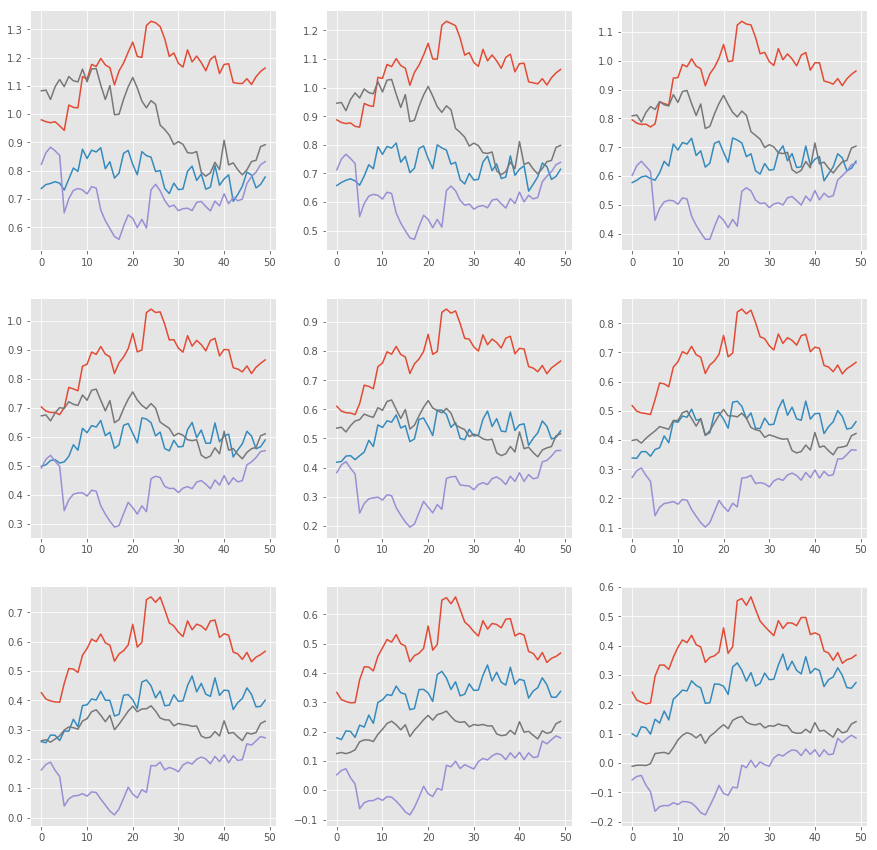

In [566]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
for t in range(3):
    for m in range(3):
        ax[t,m].plot(get_profile(t*0.3+(m)*0.1).T)

In [567]:
get_profile(0.5)

array([[ 0.51808027,  0.49889471,  0.49312199,  0.4908418 ,  0.48748085,
         0.53841247,  0.5955361 ,  0.59263847,  0.58268707,  0.65004755,
         0.66779438,  0.70313073,  0.69455832,  0.72100284,  0.69231656,
         0.68390941,  0.62814102,  0.65720569,  0.67101456,  0.69363435,
         0.75846672,  0.6851959 ,  0.69811433,  0.8382869 ,  0.84856178,
         0.83228865,  0.84514494,  0.80240744,  0.75392385,  0.74722676,
         0.72327638,  0.70876829,  0.7634833 ,  0.73104565,  0.75058567,
         0.74155169,  0.72508197,  0.75753924,  0.76234644,  0.70248147,
         0.71817312,  0.71466237,  0.65556038,  0.65006424,  0.63432245,
         0.65698461,  0.62679554,  0.64472424,  0.65479628,  0.6664211 ],
       [ 0.33847174,  0.33781573,  0.36024142,  0.36055867,  0.34469006,
         0.3676858 ,  0.37381763,  0.41427253,  0.3908311 ,  0.46416126,
         0.46096643,  0.48247522,  0.47826853,  0.50565556,  0.46794579,
         0.47165438,  0.41738685,  0.42519991,  0.

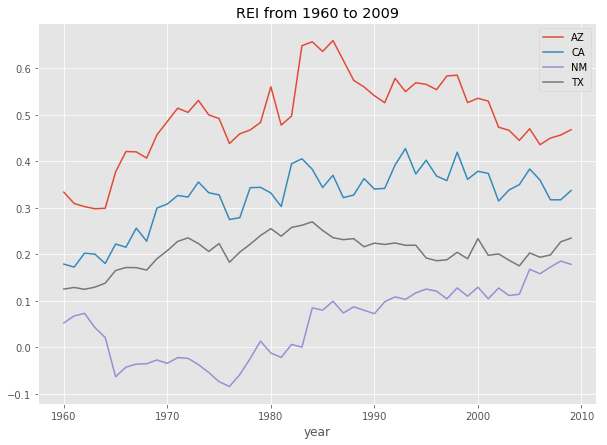

In [579]:
fig, ax = plt.subplots(1,figsize=(10,7))
labels = statename
ax.set_title('REI from 1960 to 2009')
for y_arr, label in zip(get_profile(0.7), labels):
    ax.plot(y_arr, label=label)
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(6):
    labels[i+1] = str(1960+10*i)
ax.set_xticklabels(labels)
ax.set_xlabel('year')
plt.legend()
plt.show()

In [209]:
get_profile(0.5)[:,-1]

array([ 0.15973494,  0.11306031, -0.44416618, -0.27925734])

In [245]:
listdra = np.ndarray([4,5])
for i in range(4):
    listdra[i] = factors[statename[i]][-1]

In [722]:
df

,E/T,F/T,R/T,TETGR,TETPB,group
0,0.712039,0.546484,0.164137,0.273258,0.035359,A
1,0.394762,0.405219,0.207372,0.163831,0.030107,B
2,0.392637,0.809237,0.120612,0.493616,0.194178,C
3,0.362073,0.564196,0.068304,0.551183,0.365909,D


In [725]:
cols = list(df)
cols
cols.insert(0, cols.pop(cols.index('TETGR')))

In [727]:
cols.insert(0, cols.pop(cols.index('TETPB')))

In [728]:
cols 


['TETPB', 'TETGR', 'E/T', 'F/T', 'R/T', 'group']

In [719]:
df

,TETPB,TETGR,E/T,F/T,R/T,group
0,0.712039,0.546484,0.164137,0.273258,0.035359,A
1,0.394762,0.405219,0.207372,0.163831,0.030107,B
2,0.392637,0.809237,0.120612,0.493616,0.194178,C
3,0.362073,0.564196,0.068304,0.551183,0.365909,D


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
plt.figure(figsize=(10,10))
# Set data
varss = ['TETPB','TETGR','E/T','F/T','R/T']
df = pd.DataFrame({
'group': ['A','B','C','D'],
'TETPB': [ 0.0353589 ,  0.03010666,  0.19417832,  0.36590898],
'TETGR':[ 0.27325831,  0.1638313 ,  0.49361578,  0.5511828 ],
'E/T': [ 0.71203909,  0.39476172,  0.39263693,  0.3620733 ],
'F/T':[ 0.54648403,  0.40521865,  0.80923663,  0.564196  ],
'R/T': [ 0.16413684,  0.20737246,  0.12061163,  0.06830445]
})
df = df.ix[:, cols] 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[:-1]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(108)
plt.yticks([0,0.2,0.4,0.6,0.8,1], color="black", size=7)
plt.ylim(0,1)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=statename[0])
ax.fill(angles, values, 'skyblue', alpha=0.3)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=statename[1])
ax.fill(angles, values, 'r', alpha=0.3)

values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=statename[2])
ax.fill(angles, values, 'g', alpha=0.3)

values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=statename[3])
ax.fill(angles, values, 'y', alpha=0.3)
ax.set_title('Five key indicators of four states in 2009')

 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [701]:
mod[0]

array([[ 0.02518635,  0.21777338,  0.78538803,  0.48476329,  0.14117625],
       [ 0.02113411,  0.10574655,  0.41462645,  0.30321448,  0.22630576],
       [ 0.17470577,  0.3386002 ,  0.46600167,  0.80248874,  0.14531204],
       [ 0.26348913,  0.45498531,  0.44513719,  0.46893069,  0.08341192]])

In [707]:
mod[0]

array([[ 0.02518635,  0.21777338,  0.78538803,  0.48476329,  0.14117625],
       [ 0.02113411,  0.10574655,  0.41462645,  0.30321448,  0.22630576],
       [ 0.17470577,  0.3386002 ,  0.46600167,  0.80248874,  0.14531204],
       [ 0.26348913,  0.45498531,  0.44513719,  0.46893069,  0.08341192]])

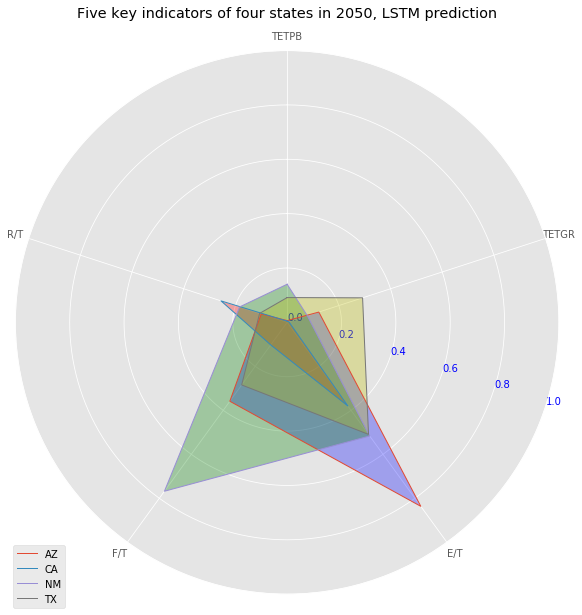

In [714]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
plt.figure(figsize=(10,10))
# Set data
varss = ['TETPB','TETGR','E/T','F/T','R/T']
df = pd.DataFrame(mod[3])
df.columns = ['TETPB','TETGR','E/T','F/T','R/T']
df['group'] = ['A','B','C','D']
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[:-1]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(108)
plt.yticks([0,0.2,0.4,0.6,0.8,1], color="blue", size=10)
plt.ylim(0,1)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=statename[0])
ax.fill(angles, values, 'b', alpha=0.3)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=statename[1])
ax.fill(angles, values, 'r', alpha=0.3)

values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=statename[2])
ax.fill(angles, values, 'g', alpha=0.3)

values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=statename[3])
ax.fill(angles, values, 'y', alpha=0.3)
ax.set_title('Five key indicators of four states in 2050, LSTM prediction')

 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [298]:
get_profile(0.5).shape

(4, 50)

根据每个州五十年的五个各自参数的
预测 25  50年的每个州各自的五个参数  计算profile

fig, ax = plt.subplots(3,3,figsize=(18,18))
for i in range(3):
    for j in range(3):
        ax[i,j].plot(dta.diff(i*3+j+1))

In [430]:
def get_dta(stateind,ind):
    dta=pd.Series(factors_[statename[stateind]][:,ind])
    dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','2009'))
    #dta.plot(figsize=(10,6))
    return dta

In [325]:
def rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=2)
    rolstd = pd.rolling_std(timeseries, window=2)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

rolling_statistics(dta)

In [398]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #rolling_statistics(timeseries)#绘图
    #print 'Results of Augment Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput['p-value']

In [540]:
a.index.freq

In [544]:
arm_pred = np.ndarray([4,5,41])
for i in range(5):
    for j in range(4):
        a =  get_dta(j,i)
        ts_log = pd.Series(np.ma.log(np.array(a)))
        ts_log.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','2009'))
        ts_log_diff = ts_log - ts_log.shift(periods=1)
        ts_log_diff.dropna(inplace=True)
        arma_mod = sm.tsa.ARMA(ts_log_diff,(4,1,4)).fit()
        #arm_pred[j,i] = 
        arma_mod.predict(ts_log_diff,'2009','2050', dynamic=True)
    #print(predict_sunspots)
    #fig, ax = plt.subplots(figsize=(6, 4))
    #ax = a.ix['1960':].plot(ax=ax)
    #predict_sunspots.plot(ax=ax)

ValueError: Unknown string format

In [532]:
a

1960-12-31    0.039924
1961-12-31    0.034380
1962-12-31    0.030130
1963-12-31    0.028450
1964-12-31    0.027905
1965-12-31    0.028168
1966-12-31    0.027205
1967-12-31    0.021866
1968-12-31    0.020432
1969-12-31    0.021293
1970-12-31    0.018781
1971-12-31    0.016161
1972-12-31    0.015126
1973-12-31    0.018497
1974-12-31    0.015450
1975-12-31    0.019136
1976-12-31    0.017850
1977-12-31    0.028656
1978-12-31    0.025212
1979-12-31    0.035749
1980-12-31    0.009839
1981-12-31    0.013912
1982-12-31    0.012285
1983-12-31    0.015302
1984-12-31    0.017337
1985-12-31    0.020508
1986-12-31    0.020455
1987-12-31    0.016730
1988-12-31    0.015290
1989-12-31    0.017547
1990-12-31    0.016202
1991-12-31    0.018239
1992-12-31    0.023692
1993-12-31    0.013880
1994-12-31    0.013262
1995-12-31    0.017469
1996-12-31    0.009156
1997-12-31    0.013804
1998-12-31    0.021576
1999-12-31    0.019387
2000-12-31    0.020862
2001-12-31    0.022662
2002-12-31    0.017349
2003-12-31 

plist = []
for i in range(4):
    for j in range(5):
        plist.append(adf_test(get_dta(i,j)))

np.array(plist).reshape([4,5])

In [514]:
ts_log = pd.Series(np.ma.log(np.array(a)))
ts_log.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','2009'))
ts_log_diff = ts_log - ts_log.shift(periods=1)
ts_log_diff.dropna(inplace=True)

In [516]:
a= a.diff(1)

In [518]:
adf_test(ts_log_diff)

1.8045962603243236e-13

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    return dftest[1]

test_stationarity(ts_log_diff)

import sys
from statsmodels.tsa.arima_model import ARMA
def _proper_model(ts_log_diff, maxLag):
    best_p = 0 
    best_q = 0
    best_bic = sys.maxint
    best_model=None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            model = ARMA(ts_log_diff, order=(p, q))
            try:
                results_ARMA = model.fit(disp=-1)
            except:
                continue
            bic = results_ARMA.bic
            #print bic, best_bic
            if bic < best_bic:
                best_p = p
                best_q = q
                best_bic = bic
                best_model = results_ARMA
    return best_p,best_q,best_model
_proper_model(ts_log_diff, 4)

model = ARMA(ts_log_diff,order=(5,1,5)) #第二个参数代表使用了一阶差分
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff,color='g')
plt.plot(results_AR.fittedvalues, color='red') #红色线代表预测值
plt.title('RSS:%.4f' % sum((results_AR.fittedvalues-ts_log_diff)**2))#残差平方和

import statsmodels.api as sm
def acf_pacf_plot(ts_log_diff):
    sm.graphics.tsa.plot_acf(ts_log_diff,lags=40) #ARIMA,q
    sm.graphics.tsa.plot_pacf(ts_log_diff,lags=40) #ARIMA,p
acf_pacf_plot(ts_log_diff)

print(sm.stats.durbin_watson(arma_mod.resid.values))
#因此，当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性。
#这样只要知道ＤＷ统计量的概率分布，在给定的显著水平下，根据临界值的位置就可以对原假设Ｈ０进行检验。

resid = arma_mod.resid#残差
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))
'''
检验的结果就是看最后一列前十二行的检验概率（一般观察滞后1~12阶），
如果检验概率小于给定的显著性水平，比如0.05、0.10等就拒绝原假设，
其原假设是相关系数为零。就结果来看，如果取显著性水平为0.05，
那么相关系数与零没有显著差异，即为白噪声序列。
'''